## EasyVisa Project


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [4]:
visa = pd.read_csv('/content/drive/MyDrive/PythonForDataScience/EasyVisa.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

data = visa.copy()

## Overview of the Dataset

In [6]:
data.head() ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
data.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


In [9]:
data.shape

(25480, 12)

### Check the data types of the columns for the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [11]:

data.duplicated().sum()

0

The data has rows 25480, and 12 columns.
• No_of_employees, year_of_estab have int64 (numerical) data, prevailing_wage has float64( numerical) data.
Other variables have (object) categorical data.

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [13]:
data.loc[data["no_of_employees"]<0].shape ## Complete the code to check negative values in the employee colume

(33, 12)

In [14]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"]) ## Write the function to convert the values to a positive number

In [15]:
data.loc[data["no_of_employees"]<0].shape

(0, 12)

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The average number of employees in the employer's organization is 5667 while the median number of employees in the employer's organization is 2109. This implies the attribute has a right-skewed distribution with several positive outliers.
• There are companies in the dataset with years of establishment from 1800 to 2016.
• The average prevailing wage for the occupation in the United States is USD 74,455 while the median (~50th percentile of wages) is USD 70,308. This indicates, slight right skewness
in the data set. The minimum value of USD 2.1367 and the maximum value is USD 319210.

#### Let's check the count of each unique category in each of the categorical variables

In [17]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

• The most popular continent for the employee is Asia-16861, followed by Europe-3732 and North America-3292. The least popular continent of employees is Oceania 192.
• Most of the employees obtained a Bachelor's degree-10234, followed by a Master's degree- 9634. The least of employees hold Doctorate degree- 2192.
Most employees have job experience-14802, compared to
those employees who don’t have job experience-10687.
• Most employers do not require job training-22525, compared to the employees who required job training-2955.
• Most foreign employees were hired in the Northeast region of the US-7195, followed by South-7017, and West-6586. The least foreign employees were hired in Island-375.
• Most employees have yearly wages-22962, followed by holy wages-2157, and weekly wages-272. The least wage for the hired employees is monthly-89.
• Most of the employees were hired for fun time job-22773, compared to part-time position-2707.
• Most of the employees were granted visa-17018.

In [18]:
# checking the number of unique values
data["case_id"].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [19]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

In [20]:
data[data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

• The data has no duplicates.
• There is no missing data.
• The case ID attribute is dropped as it is a unique
ID variable and is not expected to add any value to the status of a visa being accepted.

### Univariate Analysis

In [21]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

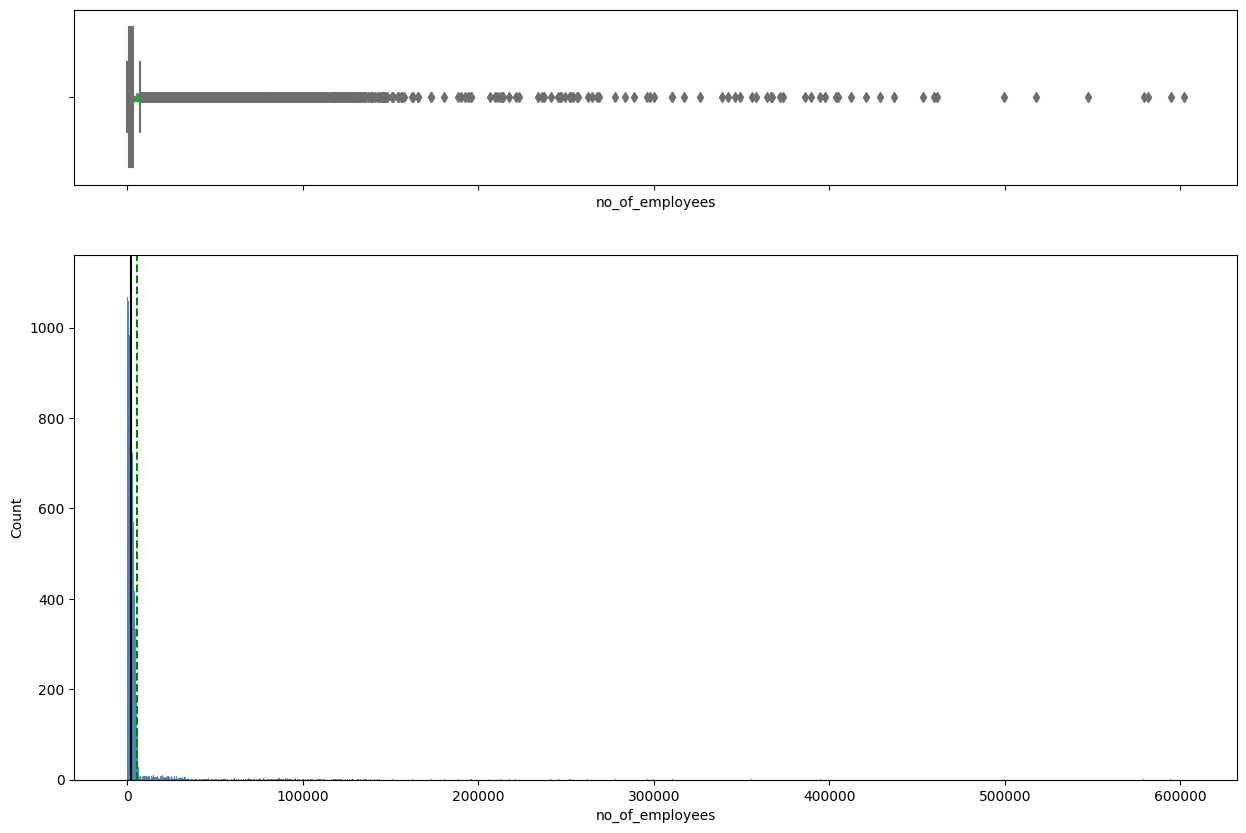

In [22]:
histogram_boxplot(data, "no_of_employees")

The distribution of the number of employees for employers is heavily skewed right.
• We can observe that some companies have more than 1000 employees which can be indicated as multinational companies.

#### Observations on prevailing wage

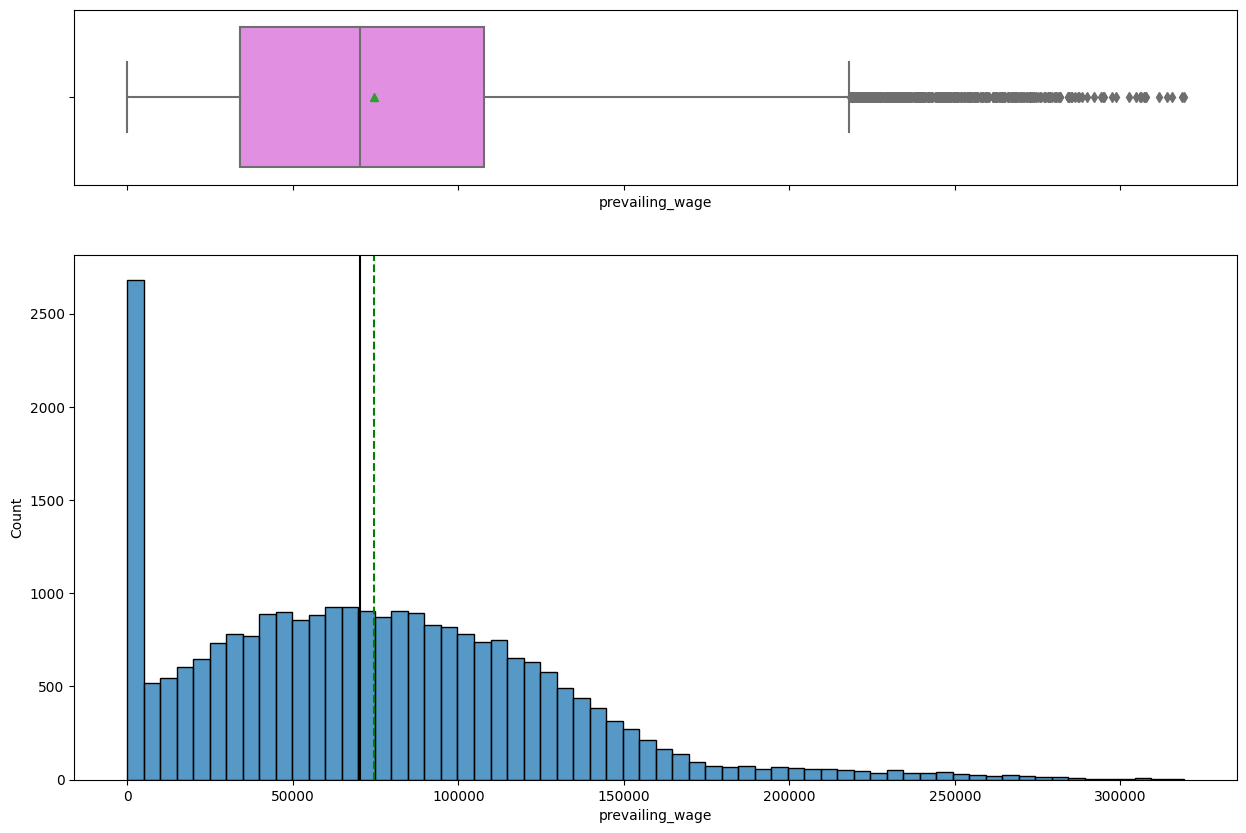

In [23]:
histogram_boxplot(data,'prevailing_wage')

The distribution of prevailing wage for employers is heavily skewed right.
• Can observe that the average prevailing wage is around USD 74455.
• Where the minimum prevailing wage is around USD 2, which can be indicating an hourly payment.
• The maximum prevailing wage is more than USD 319210, which can be inciting that the employees hired for a full-time job with a high probability of a Doctorate and full-time contract.

In [24]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage']<100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [25]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() ## code to get the count of the values in the mentioned column

Hour    176
Name: unit_of_wage, dtype: int64

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

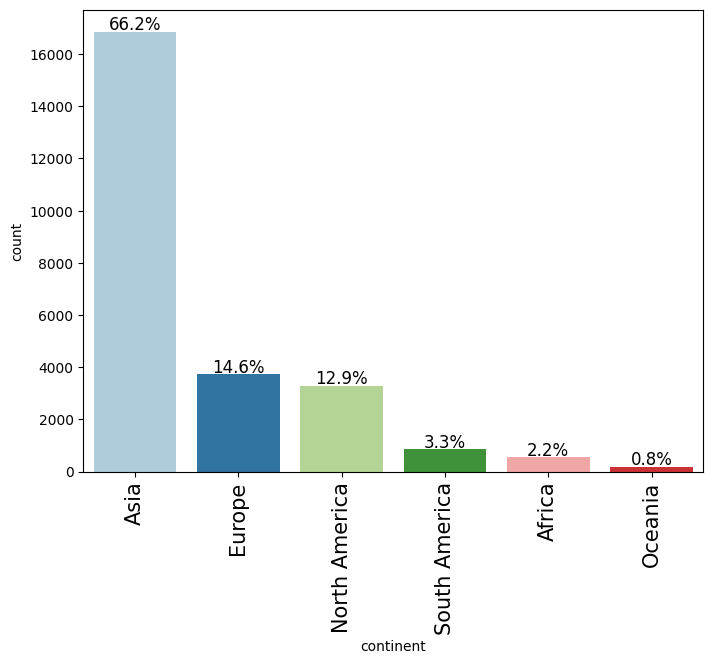

In [27]:
labeled_barplot(data, "continent", perc=True)

• The majority of employees (66.2%) are from Asia, followed by European employees (14.6%), and North America (12.9%).
• The least of employees (0.8%) are from Oceania.

#### Observations on education of employee

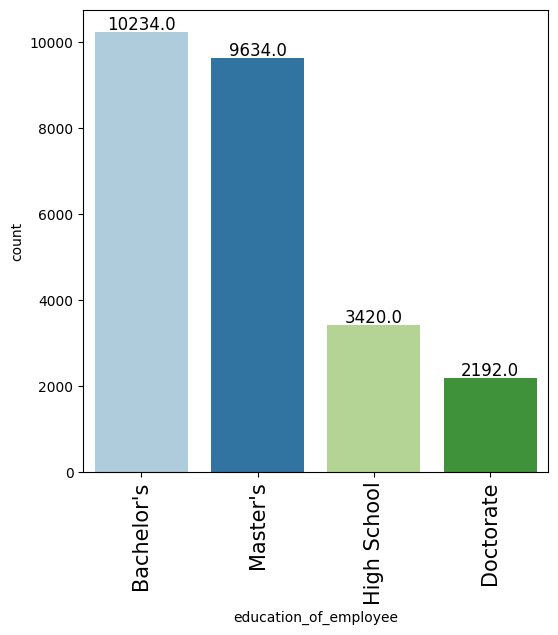

In [28]:
labeled_barplot(data,'education_of_employee')

• The majority of employees have either a bachelor's (10234) or a master's (9634) and the minority of applicants have either a doctorate (2192) or only a high school diploma (3420).

#### Observations on job experience

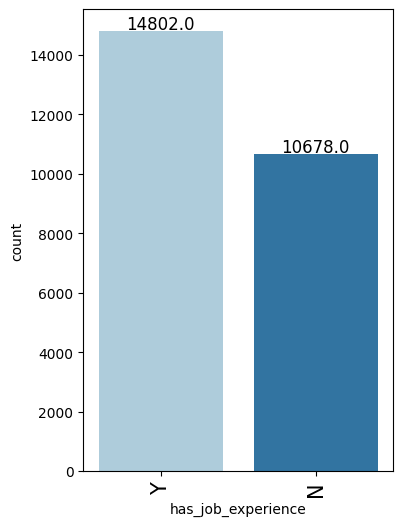

In [29]:
labeled_barplot(data,'has_job_experience')

#### Observations on job training

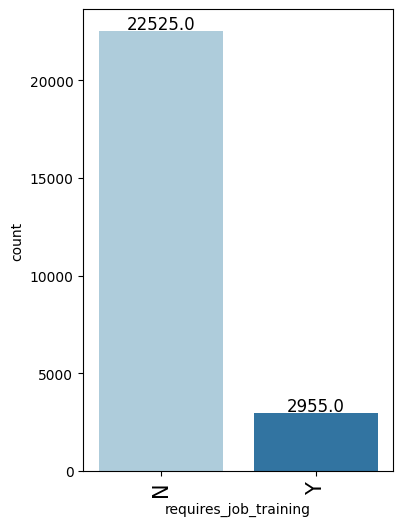

In [30]:
labeled_barplot(data,'requires_job_training')

• Around 14802 employees have prior job experience and 10678 employees do without job experience.
• The majority of employees do not require job training (22525). Although we observed that only 14803 had prior job experience.
• Some occupations may require employees with no prior job experience.

#### Observations on region of employment

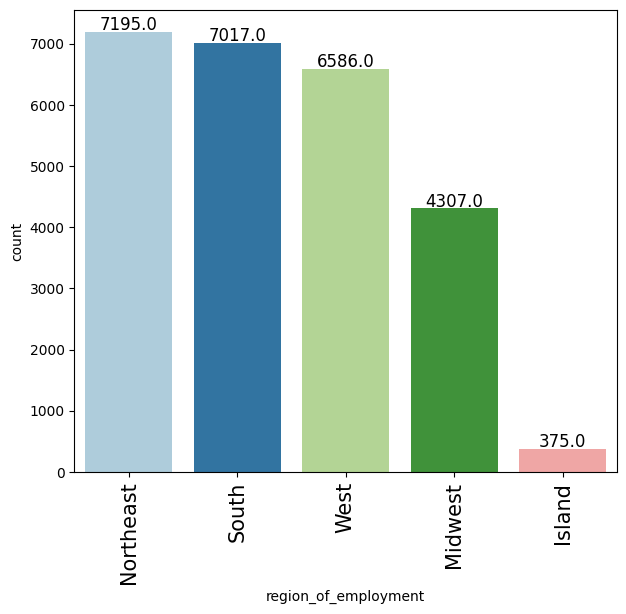

In [31]:
labeled_barplot(data,'region_of_employment')

• Northeast, South, and West have employment opportunities with Human Resource shortages with 7195-6585 employees applying for visa approval to these regions, followed by Midwest (4307) and Island (375).

#### Observations on unit of wage

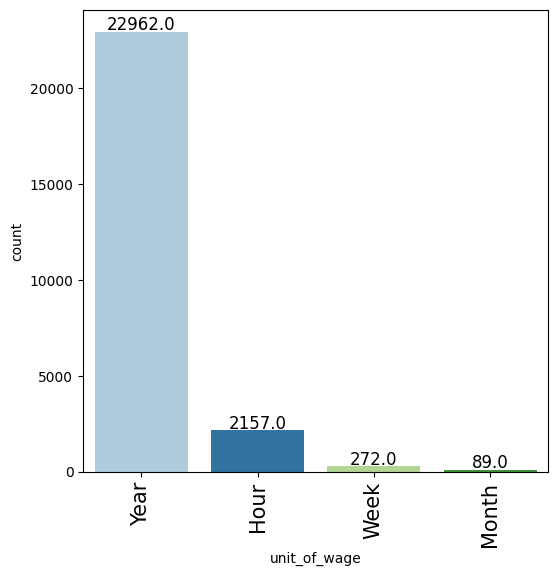

In [32]:
labeled_barplot(data,'unit_of_wage')

#### Observations on case status

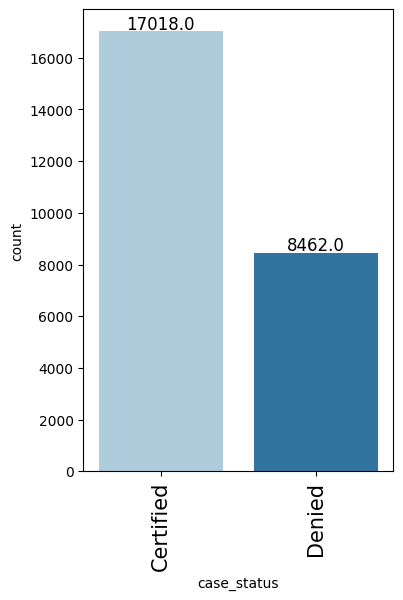

In [33]:
labeled_barplot(data,'case_status')

•Almost 22962 employees of all entries are with unit_of_wage as yearly and only 2157 employees entries as hourly.
• The least wage for the employees monthly 89.
• Most of the employees
have obtained visa-17018, where only 8462 employees were denied a visa.

### Bivariate Analysis

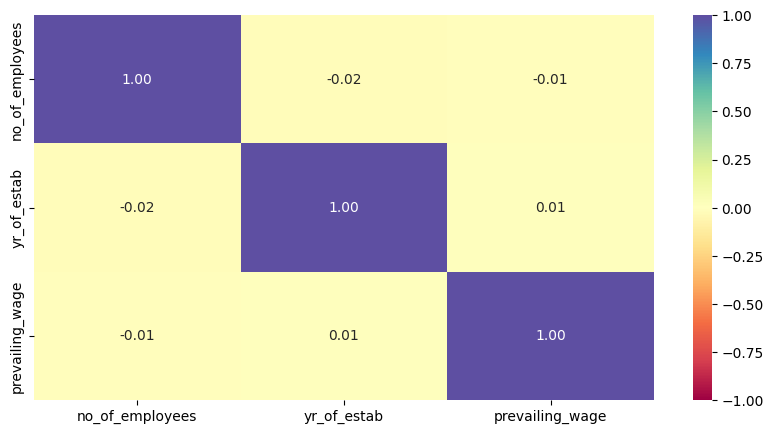

In [34]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

● There is a negative correlation between no_of_employees and prevaling_wage, no_of employees and yr_of_etsablishment.
● Also, there is a positive correlation between prevaling_wage and yr_of_etablishment.

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


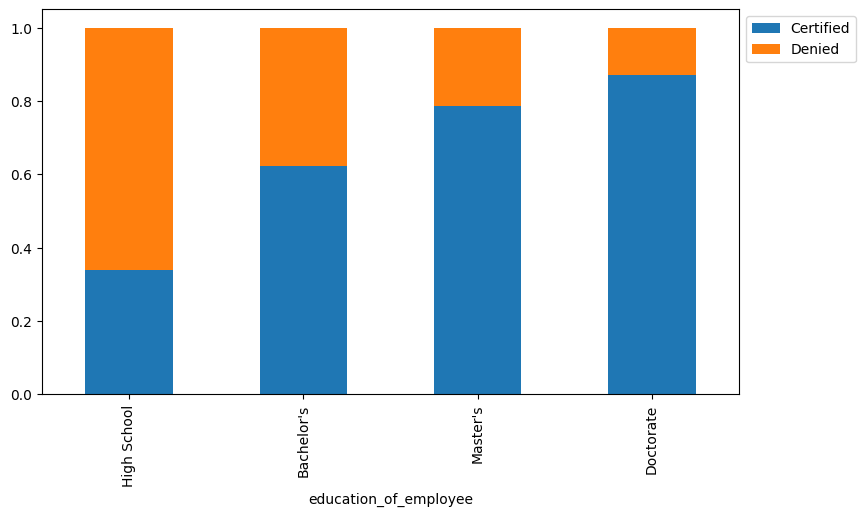

In [37]:
stacked_barplot(data, "education_of_employee", "case_status")

• As expected, the least denied visa is for employees who obtained a Doctoral degree, and most cases were denied for employees holding only High School certificates.
• The trend shows the higher education an employee holds the more chances to obtain a visa.

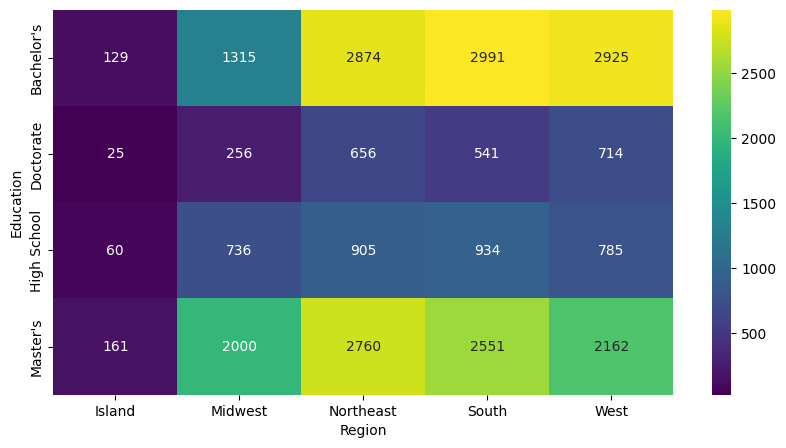

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data.education_of_employee,data.region_of_employment),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

• Most employees who obtained Bachelor's degrees applied for Northeast, South, and West regions. Employees with Master's degrees mostly applied for Northeast and South regions.
• Region Island has the least applications.
• Employees holding Doctorate degrees are mostly interested in the West region.
• Employees holding high School certificates interested in Northeast and South regions.

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


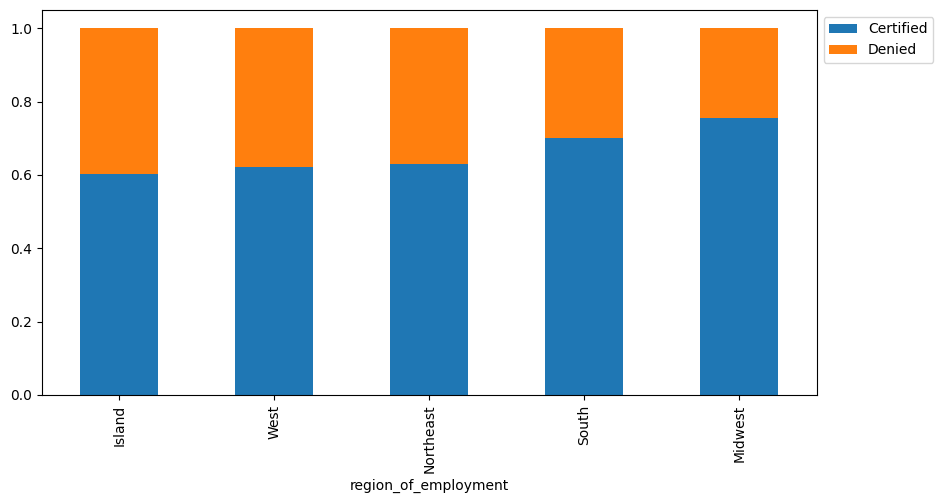

In [39]:
stacked_barplot(data,'region_of_employment','case_status')

• Across all the mentioned regions of employment, the high chances to obtain the visa are for Midwest and South regions.
• In regions such as Island, West, or Northeast chances to obtain the visa are approximately equal.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


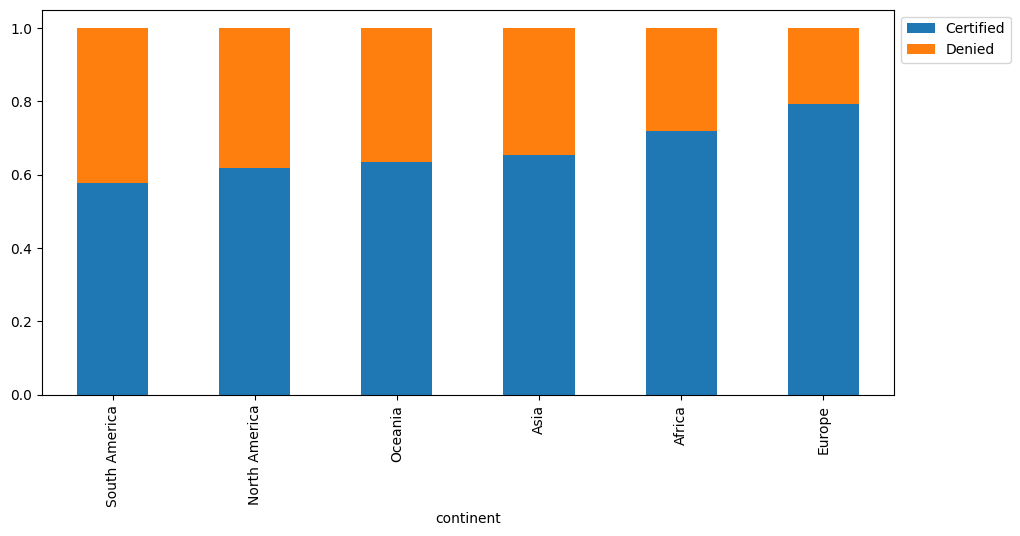

In [40]:
stacked_barplot(data,'continent','case_status')

• Across all the mentioned continents the most denied visa for the employees for South America.
• North America and Oceania, Asia has the same chances of being denied.
• The least chances to be denied is for European employees to obtain visas.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


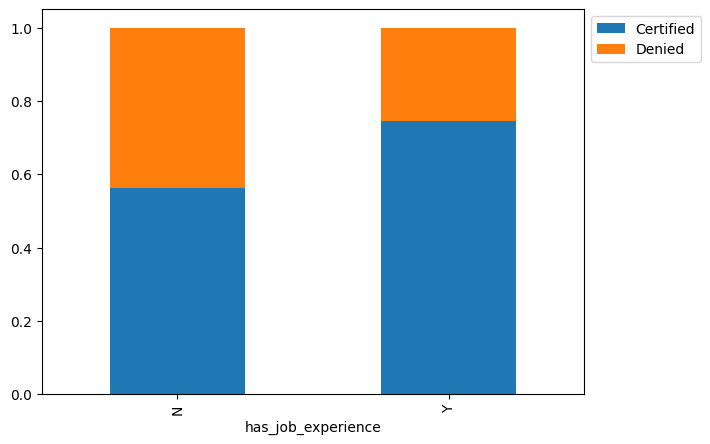

In [41]:
stacked_barplot(data,'has_job_experience','case_status')

• Experienced professionals might look abroad for opportunities to improve their lifestyles and career development.
• Having work experience influences visa certification. Hence, if the employees have prior work experience they are more likely obtain the visa.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


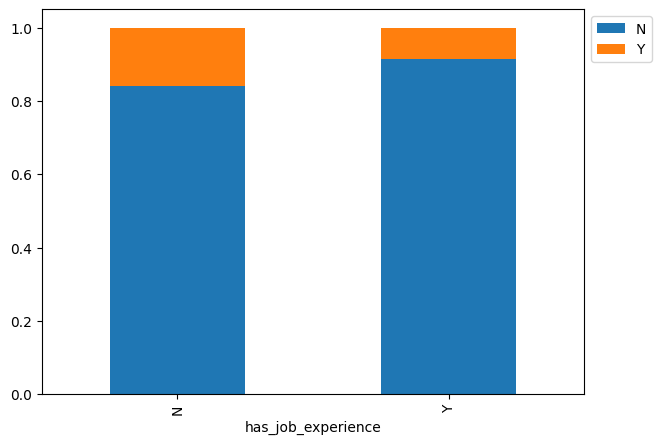

In [42]:
stacked_barplot(data,'has_job_experience','requires_job_training')

• Employees who have prior work experience do not much require job training compared to employees without job experience.

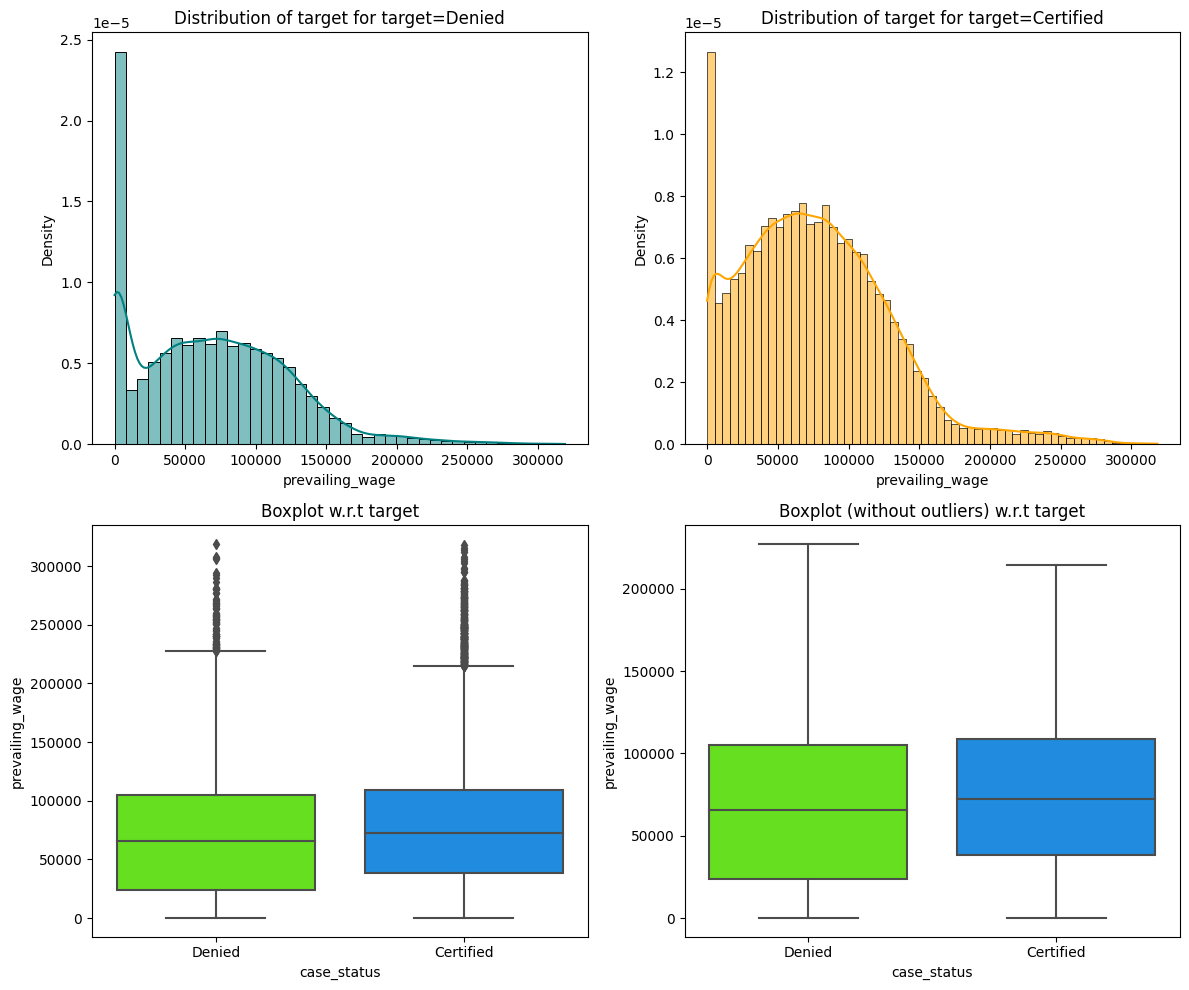

In [43]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

• The US government has established a prevailing wage to protect local talent and foreign workers. The visa status changes with the prevailing wage.
• The average certified case status is slightly higher compared to denied status. Hence the average prevailing wage is slightly higher for a certified visa compared to denied visa status.

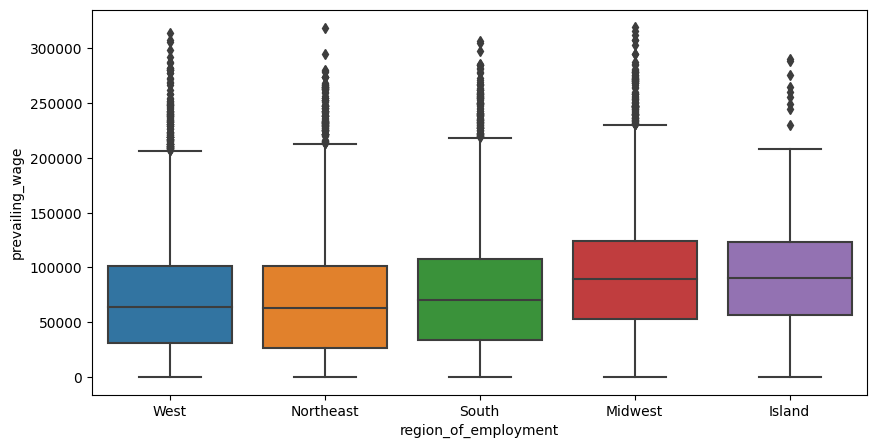

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment',y='prevailing_wage')
plt.show()

• The prevailing wage is not similar across all the regions of the US.
• The highest average prevailing wage in Midwest and Island.
• West, Northeast, and South have an approximately equal average prevailing wage.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


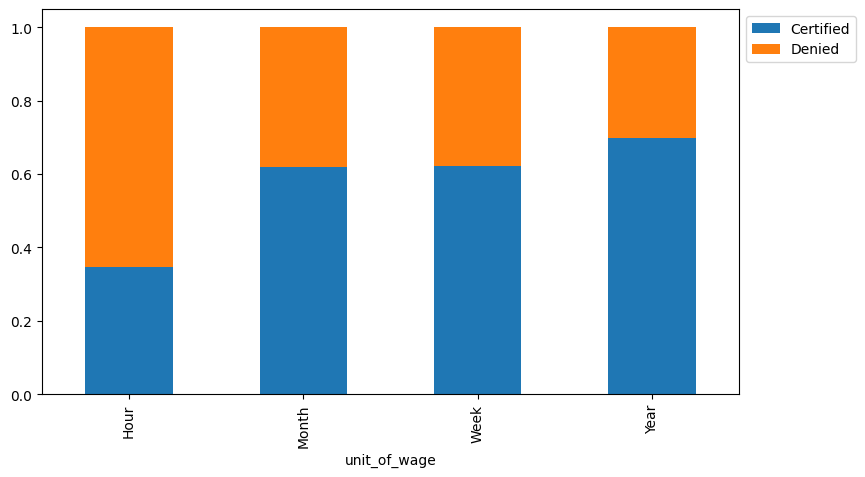

In [45]:
stacked_barplot(data,'unit_of_wage','case_status')

• The prevailing wage has different units (Hourly, Weekly, etc). It has an impact on visa applications getting certified.
• Most of the employees were granted visas and paid yearly, meaning they were employed full- time.
• Those employees who were paid weekly and monthly have equal cases of obtaining the visa.
• Only employees who were paid hourly have a great chance to be denied visa applications.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

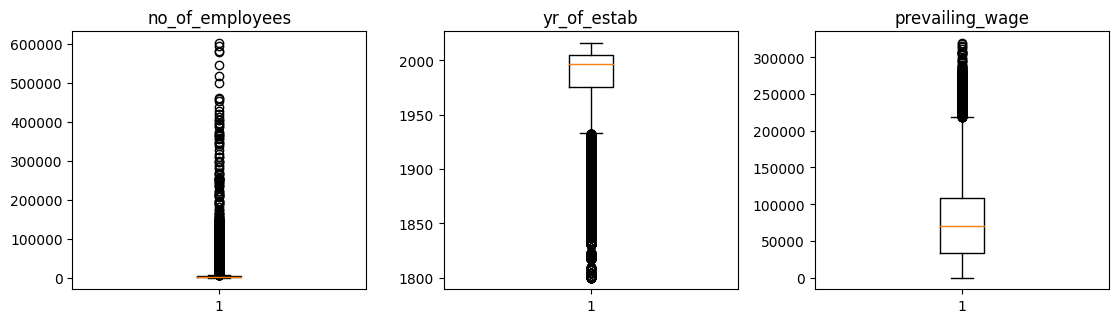

In [46]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

● All the variables have outliers, however, we will not treat them as they will be important for further analysis.

### Data Preparation for modeling

- We want to predict which visa will be certified.


In [47]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop('case_status', axis=1)
Y = data["case_status"]


X = pd.get_dummies(X,drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=1, stratify=Y)

In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.


* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [51]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

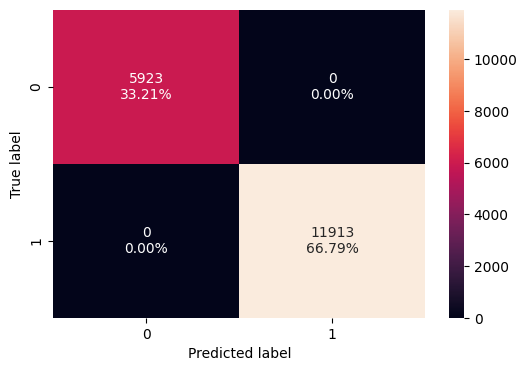

In [52]:
confusion_matrix_sklearn(model, X_train, y_train)

In [53]:
decision_tree_perf_train = model_performance_classification_sklearn( model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


• The decision tree is overfitting the data set.
• Training metrics are high. F1_score for the training set is 1.

#### Checking model performance on test set

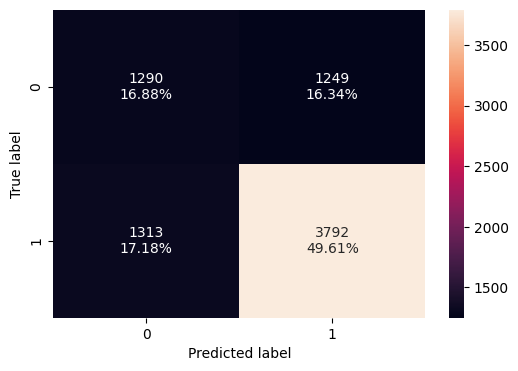

In [54]:
confusion_matrix_sklearn(model, X_test, y_test)

In [55]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


• The decision tree is overfitting the data set.
• Training metrics are high, F1_score for the test set is only 0.74.

### Hyperparameter Tuning - Decision Tree

In [56]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

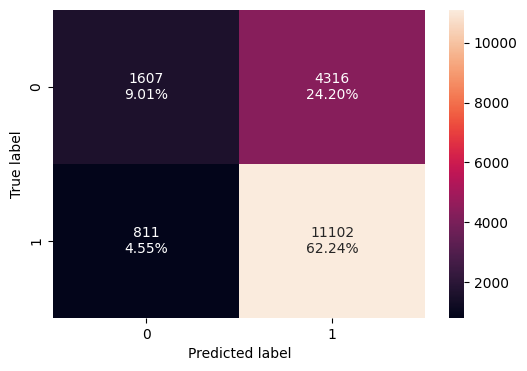

In [57]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [58]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


• The hyperparameter-tuned decision tree is not overfitting the dataset, as well the F1 score has improved.
• The F1 score for the training dataset is 0.81.

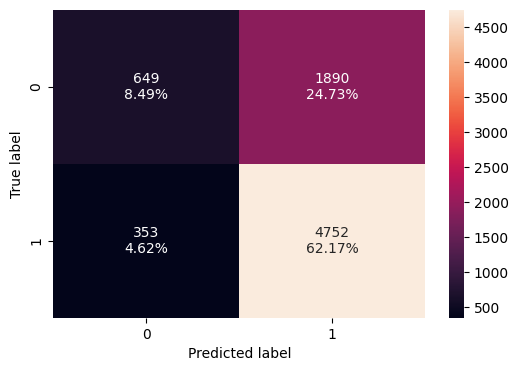

In [59]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [60]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


• The hyperparameter-tuned decision tree is not overfitting the dataset, as well the F1 score has improved.
• The F1 score for the test set is 0.80.

In [61]:

from sklearn.tree import DecisionTreeClassifier

In [62]:
from sklearn import tree

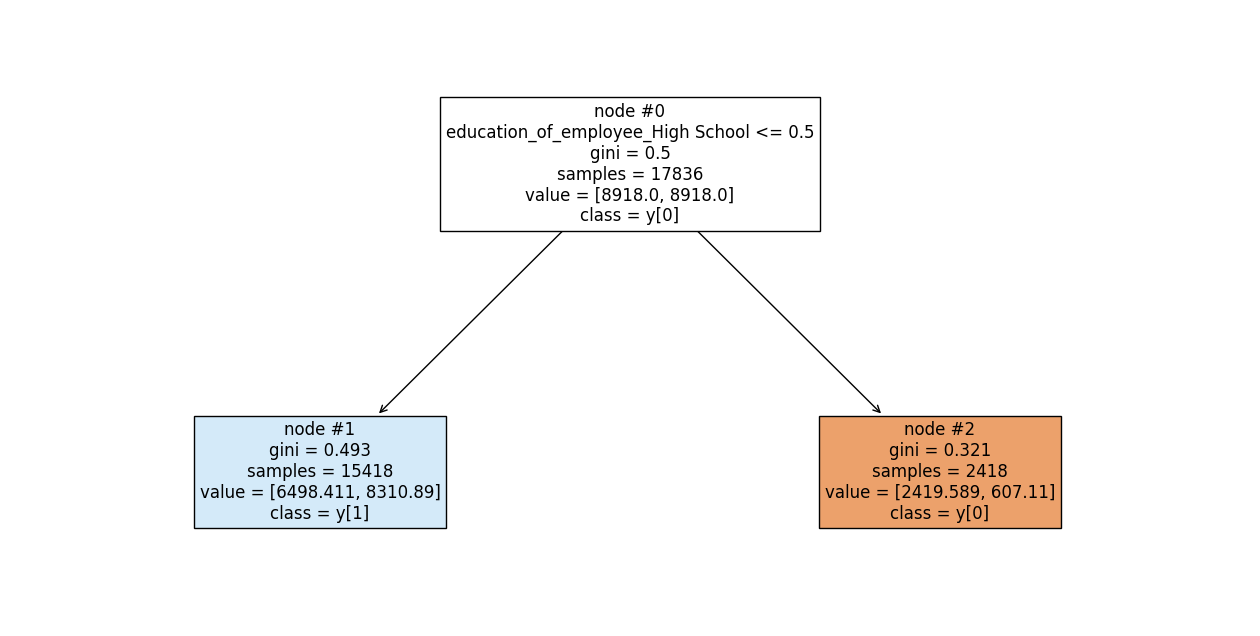

In [63]:
feature_names = list(X.columns)
plt.figure(figsize=(16,8))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

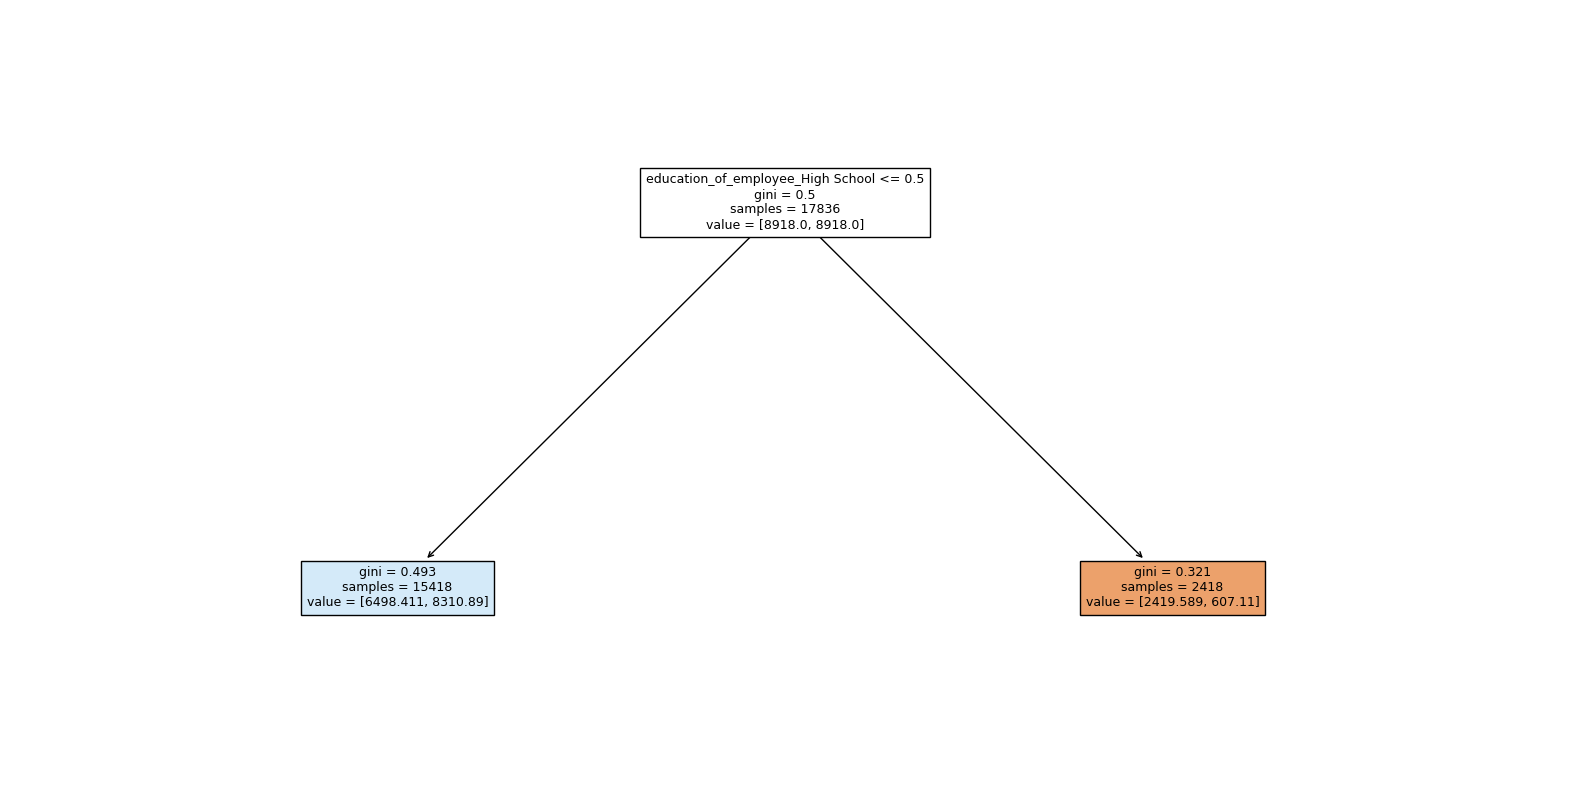

In [64]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtree_estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [65]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

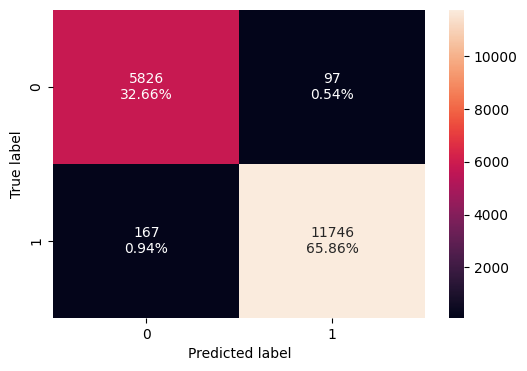

In [66]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [67]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


• The bagging classifier is also overfitting the data set.
• The F1 score is 0.98. It is a large difference compared to the test set.

#### Checking model performance on test set

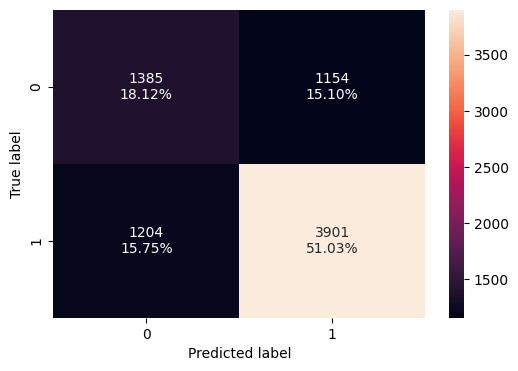

In [68]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [69]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


• The test set shows that the F1 score dramatically dropped compared to the training set.
• The F1 score on the test set is 0.76.

### Hyperparameter Tuning - Bagging Classifier

In [70]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

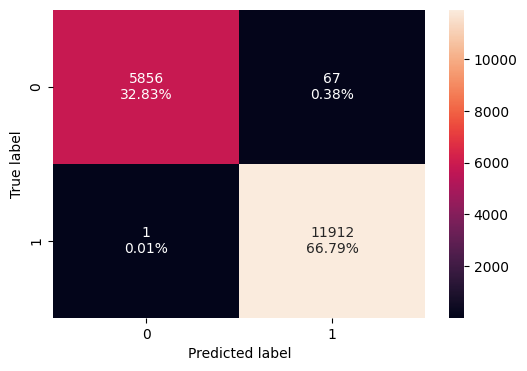

In [71]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train,y_train)

In [72]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


• The model is still found to overfit the data, as the training metrics are high.
• The F1 score for the training set is 0.99.

#### Checking model performance on test set

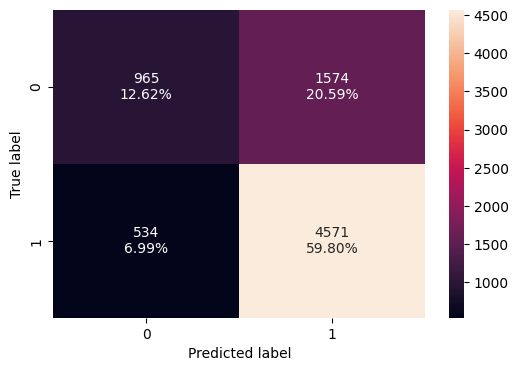

In [73]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test,y_test)

In [74]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


● The F1 score for the test set is 0.81 which is relatively lower compared to the training set F1.

### Random Forest

In [75]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1,class_weight = 'balanced')
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

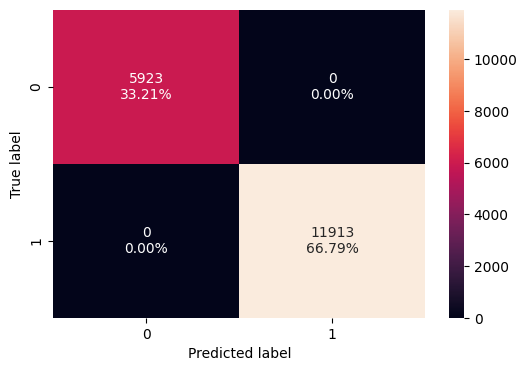

In [76]:
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [77]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


• The hyperparameter-tuned decision tree is overfitting the dataset, as the F1 score for the training set is 1.

#### Checking model performance on test set

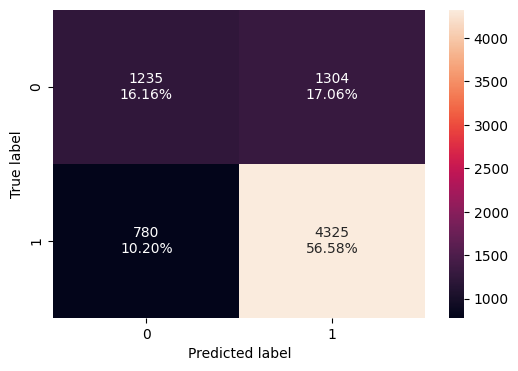

In [78]:
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [79]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


• The test set data is showing a great F1 score, relatively lower compared to the training set.

### Hyperparameter Tuning - Random Forest

In [80]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

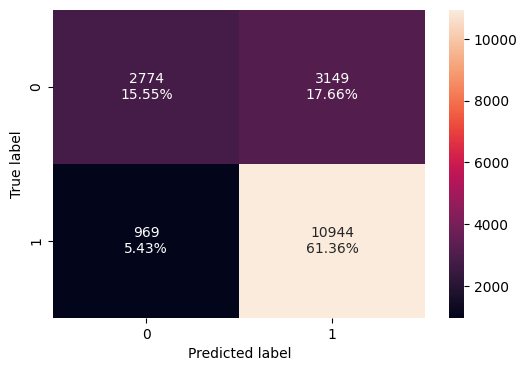

In [81]:
confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [82]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


• The hyperparameter-tuned decision tree is not overfitting the dataset, as well the F1 score has improved.
• For the training data set F1 score is 0.84.

#### Checking model performance on test set

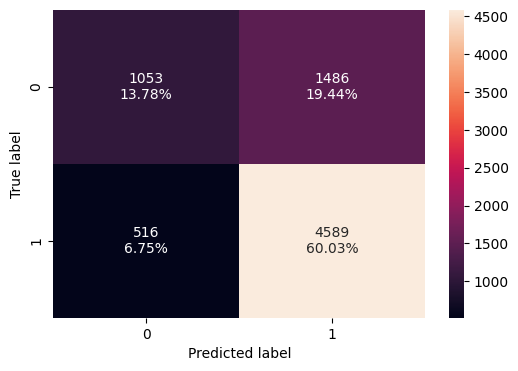

In [83]:
confusion_matrix_sklearn(rf_tuned, X_test,y_test)

In [84]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


● The model shows the F1 score is 0.82 for the test set.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [85]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

In [86]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n", ab_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


In [87]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


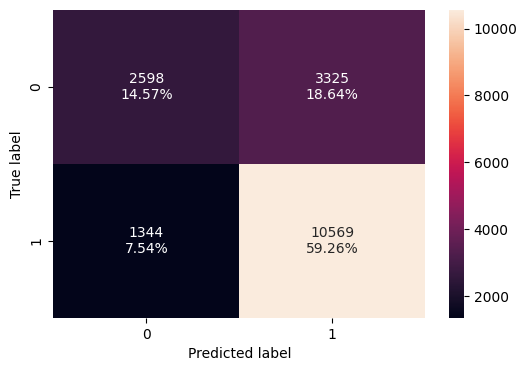

In [88]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

• Unlike the decision tree, random forest, or bagging classifier; the AdaBoost classifier is not found to overfit the data.
• It is giving a generalized performance on the training data with an F1 score of 0.81.

#### Checking model performance on test set

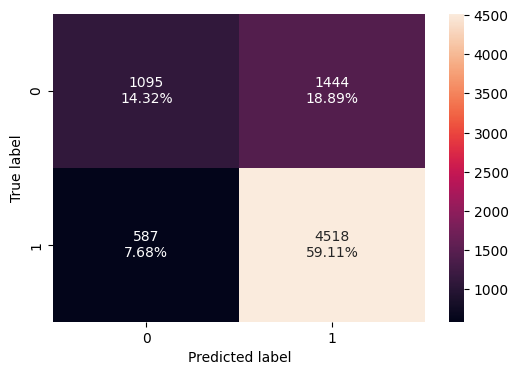

In [89]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [90]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


• Unlike the decision tree or the bagging classifier. The AdaBoost classifier is not found to overfit the data.
• It is giving a generalized performance on the test data with an F1 score of 0.81.

### Hyperparameter Tuning - AdaBoost Classifier

In [91]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

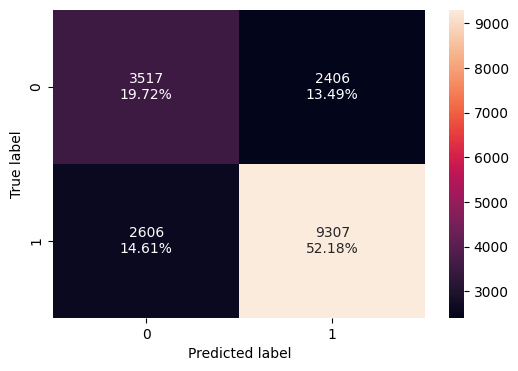

In [92]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [93]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


• The hyperparameter-tuned model is giving similar performance to the AdaBoost model.
• The F1 score for the training set is 0.78.

#### Checking model performance on test set

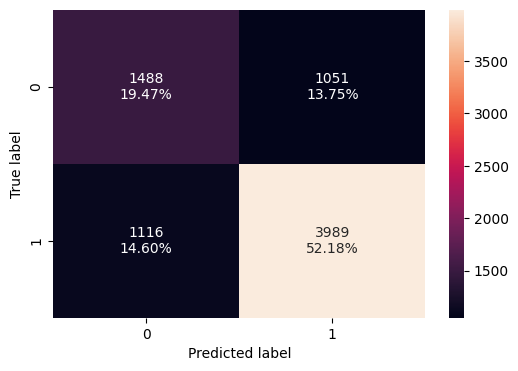

In [94]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [95]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


• The hyperparameter-tuned model is giving similar performance to the AdaBoost model.
• The F1 score for the test set is 0.78.

### Gradient Boosting Classifier

In [96]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

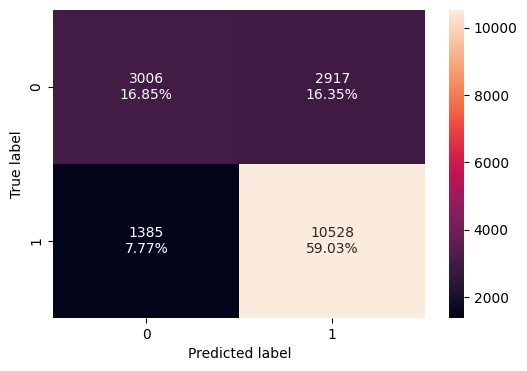

In [97]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [98]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


• The gradient boosting model is giving a good performance.
• The F1 score on the training set is 0.83.

#### Checking model performance on test set

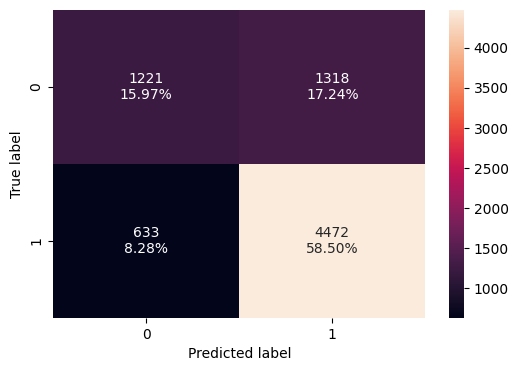

In [99]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [100]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


• The gradient boosting model is giving a good performance on the test set with an F1 score of 0.82.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [101]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

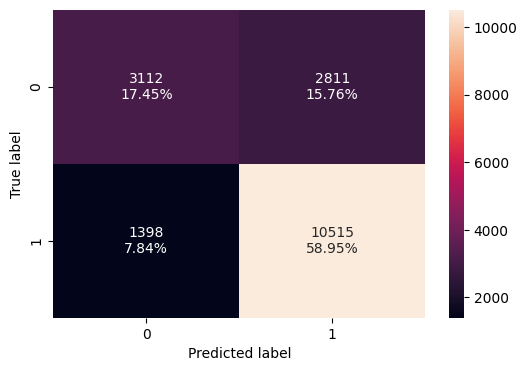

In [102]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [103]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


● After tuning hyper-parameters on the training set F1 score remains 0.83.

#### Checking model performance on test set

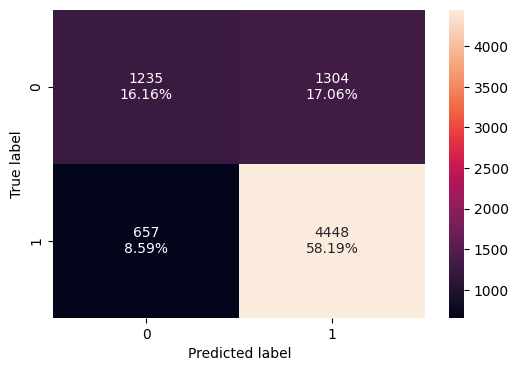

In [104]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [105]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


● After hyper-parameters running on the test set F1 score dropped from 0.82 to 0.81.

### XGBoost Classifier

In [106]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

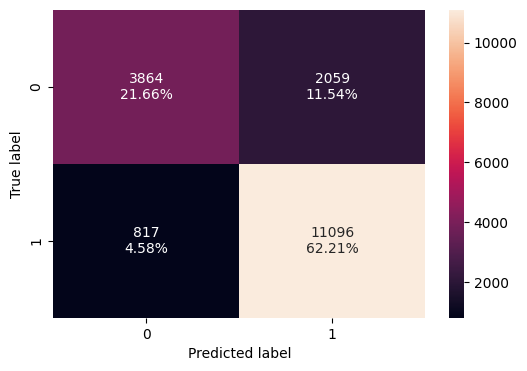

In [107]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [108]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


● Model performance with XGBoost is not overfitting.
● The F1 score on training data is 0.88.

#### Checking model performance on test set

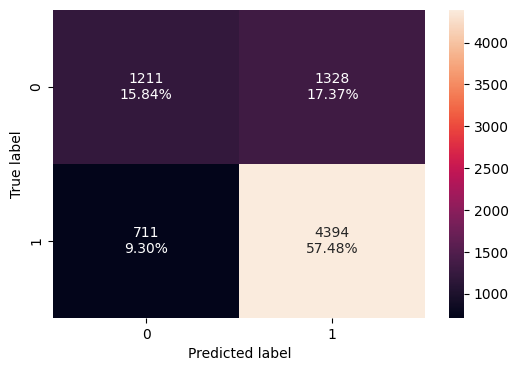

In [109]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [110]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


● The F1 score on the test data is 0.81. Hence we can conclude the model is performing well.

### Hyperparameter Tuning - XGBoost Classifier

In [111]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

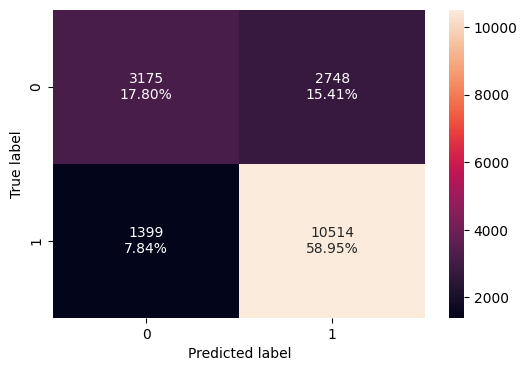

In [112]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [113]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767493,0.882565,0.792791,0.835273


• There is no overfitting, the model is giving a generalized performance on training data.
• The F1 score is 0.83.

#### Checking model performance on test set

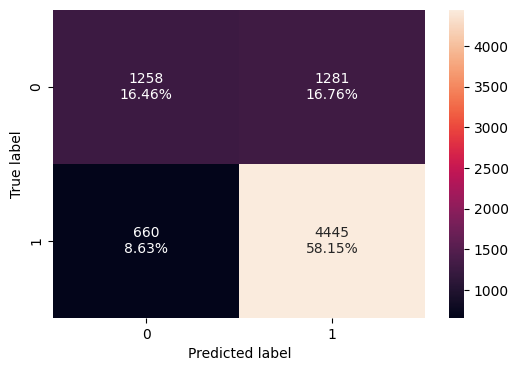

In [114]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [115]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746075,0.870715,0.776284,0.820792


• There is no overfitting, the model is giving a generalized performance on test data.
• The F1 score is 0.82.

## Stacking Classifier

In [116]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train,y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking model performance on training set

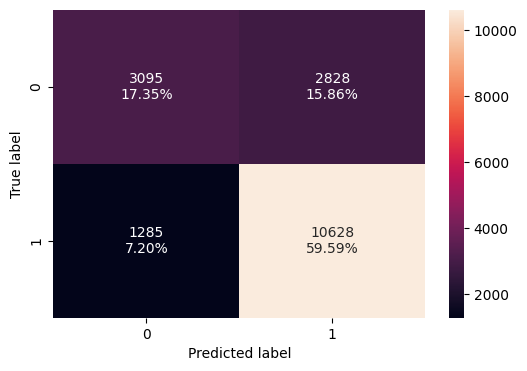

In [117]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [118]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769399,0.892135,0.789834,0.837873


• The metrics are similar to what has been observed with other models post hyperparameter tuning. The model is not overfitting & gives a generalized performance with training data F1 scores of 0.83.
• The model can identify the majority of cases that should be certified correctly.

### Checking model performance on test set

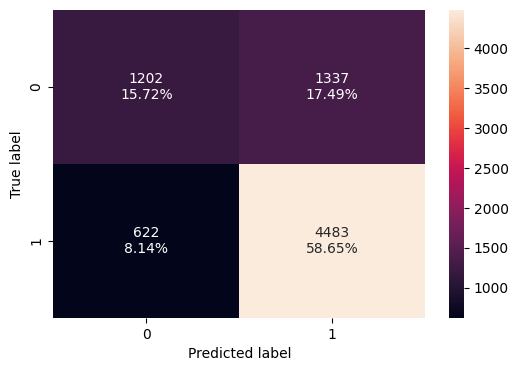

In [119]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [120]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743721,0.878159,0.770275,0.820686


• The metrics are similar to what has been observed with other models post hyperparameter tuning.
• The model is not overfitting & gives a generalized performance with test data F1 scores of 0.82.

## Model Performance Comparison and Final Model Selection

In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.767493,0.769399
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.882565,0.892135
Precision,1.0,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.792791,0.789834
F1,1.0,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.835273,0.837873


In [122]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.746075,0.743721
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.870715,0.878159
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.776284,0.770275
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820792,0.820686


• Decision tree, Tuned decision tree, Bagging classifier, Tuned Bagging classifier, and Random forest were found to overfit the data.
• Gradient Boost Classifier, XGBoost Classifier, XGBoost Classifier tuned, and Stacking Classifier are the 4 top models. They are all giving similar performances.
The ML models are able to give a generalized prediction on training & testing datasets (not prone to overfitting) and are able to explain over 80% of information (accuracy of 74% on test dataset & F1 score of 82% on test dataset).
▪ The precision & recall are both high (77% & 87% respectively)
▪ The confusion matrix is able to identify a higher percentage of cases getting certified (TP) but only a smaller percentage of cases getting denied correctly.
▪ The confusion matrix of the Model predicts that the visa application will get certified but in reality, the visa application should get denied (FP) can capture around 17%.
▪ The confusion matrixes of the Model predict that the visa application will not get certified but in reality, the visa application should get certified (FN) can capture around 8%.
• This limitation has to be borne in mind, and perhaps a reevaluation of cases getting denied can be carried out in case there is a prevailing human resource shortage in the US. The models are still helpful, as only a small subset of data will need further re-evaluation significantly decreasing time spent in the process.

### Important features of the final model

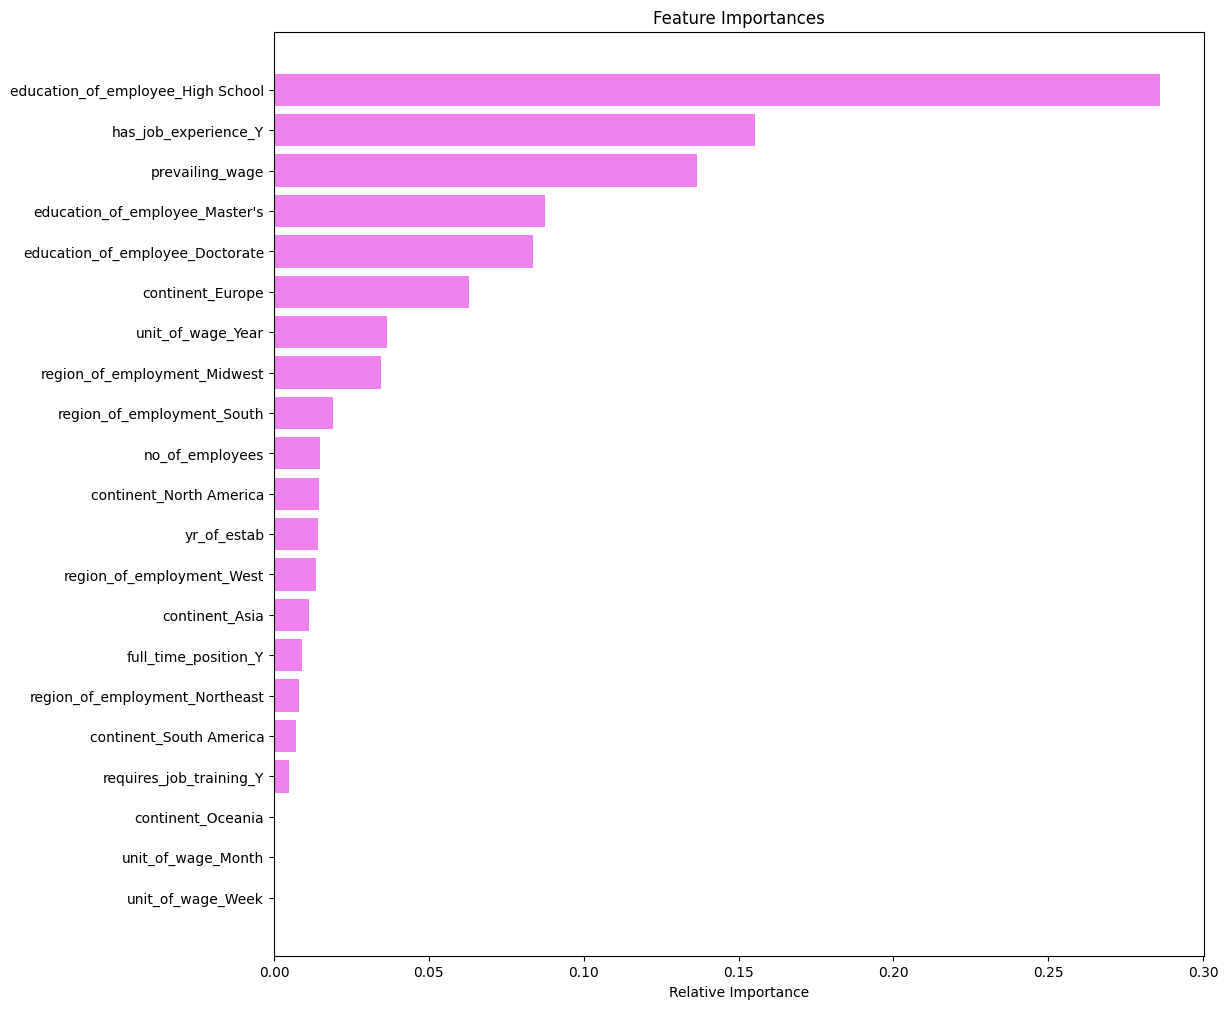

In [125]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

• The findings from the optimized model are similar to what was observed EDA.
• The education of the employee was found to be the most important attribute influencing visa certifications.
• Other important attributes found were: if an employee has prior job experience, prevailing wage, Master's degree, and
Doctorate.
• The least important feature such as unit of wage (mostly, weekly), continent Oceania do
not play an important role of obtaining the visa.

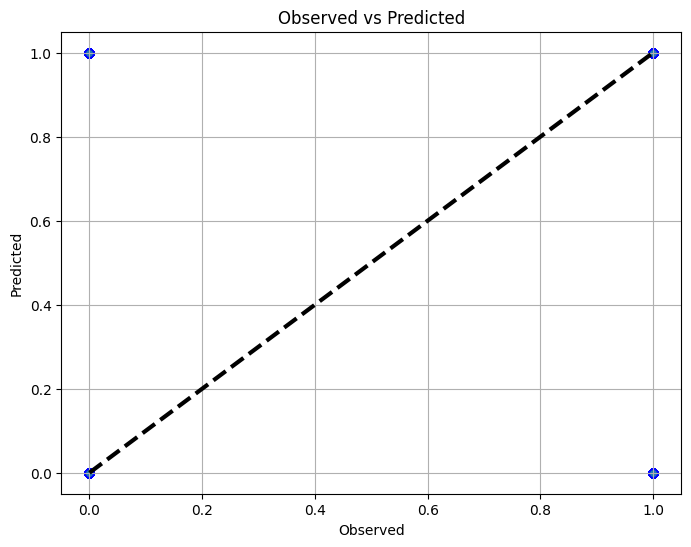

In [126]:
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=xgb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

## Business Insights and Recommendations

Based on the EDA and the Gradient Boost Classifier, XGBoost Classifier, XGBoost Classifier tuned, and Stacking Classifier models, the following features were identified as important for visas getting certified than denied
▪ Education of employee: an employee with only a high school certification has a high chance of a visa getting denied in comparison to an employee with a doctorate with a more likely chance of a visa getting certified.
▪ Employees with job experience have more likely to get a visa compared to employees without job experience.
▪ The prevailing wage is slightly higher for a certified visa compared to denied visa status.
▪ Unit of wage: an employee hired full-time with annual payment has a high chance to obtain a visa compared to
employees who are paid hourly.
▪ The continent: if the employee is from Europe, they have a high chance to obtain the visa, compared to totter
countries.
▪ Likewise, the region of the US the employment opportunity is in is also an important deciding factor with most
cases getting certified if the region is Midwest or South.
• Interestingly, attributes like if the job opportunity is full-time/part-time; if an employee requires further job
training; the annual prevailing wage of the occupation in the US; the year of establishment of the employer, or the number of employees in the organization are not important attributes & do not have much bearing on a case getting certified vs denied.

Executive Summary of the final ML model:
The ML models are able to give a generalized prediction on training & testing datasets (not prone to overfitting) and are able to explain over 80% of information (accuracy of 74% on test dataset & F1 score of 82% on test dataset).
▪ The precision & recall are both high (77% & 87% respectively)
▪ The confusion matrix is able to identify a higher percentage of cases getting certified (TP)
but only a smaller percentage of cases getting denied correctly.
▪ The confusion matrix of the Model predicts that the visa application will get certified but in
reality, the visa application should get denied (FP) can capture around 17%.
▪ The confusion matrixes of the Model predict that the visa application will not get certified but
in reality, the visa application should get certified (FN) can capture around 8%.
• This limitation has to be borne in mind, and perhaps a reevaluation of cases getting denied can be carried out in case there is a prevailing human resource shortage in the US. The models are still helpful, as only a small subset of data will need further re-evaluation
significantly decreasing time spent in the process.


Business Recommendations:
• To prioritize limited resources towards screening a batch of applications for those most likely to be approved, the company should consider the following:
• Sort applications by the level of education and review the higher levels of education first.
• Sort applications by previous job experience and review those with experience first.
• Divide applications for jobs into those with an hourly wage and those with an annual wage,
sort each group by the prevailing wage, then review applications for salaried jobs first from
highest to lowest wage.
• For those in less skilled, entry-level, and/or hourly jobs, the system would appear to be
biased against these applications being certified.
• Furthermore, OFLC should examine the reason of visa applications get granted or denied.
• If the applicant has high school certificate, less skilled, or apply for an entry job level it
should be stated as threshold for the applications.